### Treść zadania

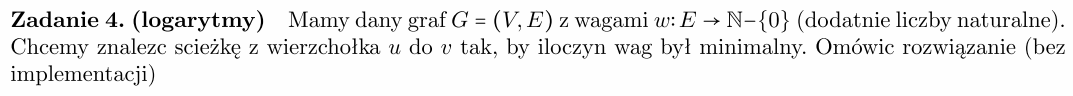

### Omówienie algorytmu

Oczywiście konieczne jest zastosowanie algorytmu Dijkstry, ponieważ wagi są nieujemne, a graf dowolny (skierowany lub nieskierowany). Zadanie można rozwiązać, zmieniając sposób relaksacji i zapisując zamiast sumy wag, ich iloczyn (iloczyn wag krawędzi na ścieżce). Nie jest to jednak optymalne rozwiązanie, ponieważ liczby mogą stać się bardzo duże, przez co program znacznie zwolni działanie (operacje na dużych liczbach są wolne) i będzie zajmował sporo pamięci (duże liczby wymagają dużo bitów do zapisania) (w Pythonie jedynym ograniczeniem na wielkości liczb jest ilość pamieci RAM w komputerze, ale w innych językach sposób z mnożeniem wag mógłby spowodować wysypanie się programu, jako rezultat przekroczenia wielkości typu liczbowego). Konieczne jest zatem sprytniejsze postąpienie. Jak sugeruje nazwa zadania, musimy skorzystać z logarytmów. W tym przypadku nie chodzi nam o konkretną długość ścieżki lub wartość tego iloczynu, a jedynie o to, aby ścieżka była jak najkrótsza (pod względem iloczynu wag krawędzi). Zauważmy zatem, że $ log(a \cdot b) = log(a) + log(b) $. Możemy więc zamienić wagi wszystkich krawędzi na logarytmy (o podstawie większej niż 1, bo chcemy aby zachowana była monotoniczność - funkcja rosnąca dla rosnacego argumentu). Wówczas algorytm Dijkstry pozostaje bez zmian, a dodawanie wag, jakie się wówczas odbywa, jest tak naprawdę dodawaniem logarytmów, a więc nawet, jeżeli chcielibyśmy pozyskać finalną wartość iloczynu wag, możemy przekształcić logarytm, jaki otrzymamy, na zwykły iloczyn (korzystamy z tego: $ log_ab = c \leftrightarrow a^c = b $).

### Złożoność

###### Obliczeniowa:
$ O(E \cdot log(V)) $  - jak Dijkstra (dla reprezentacji listowej grafu)
###### Pamięciowa:
$ O(V + E) $  - zakładam, że na wejściu otrzymujemy graf i nie możemy go modyfikować, więc tworzę nowy graf z logarytmami jako wagi krawędzi.

### Implementacja

In [1]:
import math
from queue import PriorityQueue


def dijkstra(G: 'graph represented by adjacency lists', s: 'source', t: 'target'):
    n = len(G)
    inf = float('inf')
    weights = [inf] * n
    parents = [None] * n
    pq = PriorityQueue()
    pq.put((0, s, None))

    while not pq.empty():
        min_w, u, parent = pq.get()
        # We will find the minimum total weight path only once so the
        # code below this if statement will be executed only once
        if min_w < weights[u]:
            weights[u] = min_w
            parents[u] = parent
            # Break a loop if we found a shortest path to the specified
            # target
            if u == t: break
            # Add all the neighbours of the u vertex to the priority queue
            for v, weight in G[u]:
                if weights[v] == inf:
                    pq.put((weights[u] + weight, v, u))
                
    return parents, weights


def get_path(parents, t):
    path = []
    
    while t is not None:
        path.append(t)
        t = parents[t]
        
    path.reverse()
    
    return path


def map_graph(G: 'graph represented by adjacency lists'):
    n = len(G)
    G2 = [[] for _ in range(n)]
    
    for u in range(n):
        for v, weight in G[u]:
            G2[u].append((v, math.log(weight)))
            
    return G2


def lowest_product_path(G: 'graph represented by adjacency lists', s: 'start vertex', t: 'target vertex'):
    G2 = map_graph(G)
    parents, weights = dijkstra(G2, s, t)
    
    if weights[t] == float('inf'):
        return -1, []
    
    # Reund a number as a product will always be int
    # because we have integer edges weights
    product = int(math.e ** weights[t] + 0.5)
    return product, get_path(parents, t)

###### Kilka testów

##### Pomocnicze

In [2]:
def undirected_weighted_graph_list(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[] for _ in range(n)]
    for e in E:
        G[e[0]].append((e[1], e[2]))
        G[e[1]].append((e[0], e[2]))
    return G

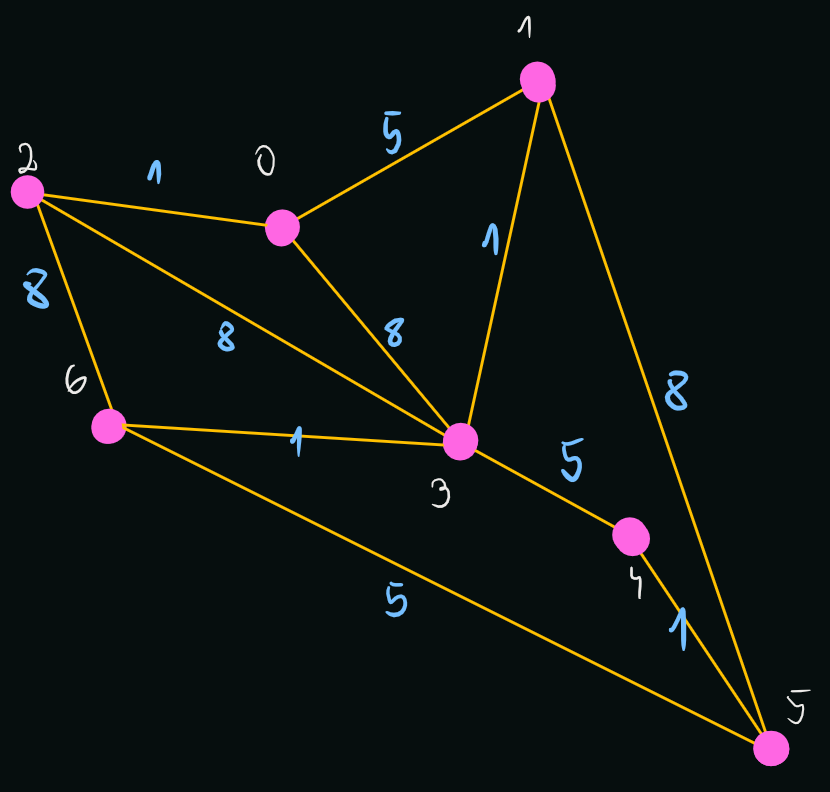

In [3]:
E = [(0, 2, 1), (0, 1, 5), (0, 3, 8), (1, 3, 1), (2, 3, 8), (2, 6, 8), (6, 3, 1), (1, 5, 8),
     (3, 4, 5), (4, 5, 1), (6, 5, 5)]

G = undirected_weighted_graph_list(E)

In [4]:
print(lowest_product_path(G, 0, 5))

(25, [0, 1, 3, 4, 5])


In [5]:
print(lowest_product_path(G, 6, 1))

(1, [6, 3, 1])


In [6]:
print(lowest_product_path(G, 2, 4))

(25, [2, 0, 1, 3, 4])


In [7]:
print(lowest_product_path(G, 5, 1))

(5, [5, 4, 3, 1])
